<a href="https://colab.research.google.com/github/rajatgermany/yelp_elite_classifier/blob/master/ProblemStatement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

# ProblemStatement - Want to predict whether a user is elite is  not 
Here ownwards will try formulating the statement 


1.   Look into the data patterns in context to the elite variable
2.   Select the variables which affect most being



In [0]:
% matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [0]:

SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [0]:
df =pd.read_csv('gdrive/My Drive/Colab Notebooks/dataexploration/yelp/yelp_user.csv')


# Data Overview


In [0]:
df.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [0]:
print('Data has {} features with {} rows '. format(df.shape[1], df.shape[0]))

Data has 22 features with 1326100 rows 


In [0]:
# categorical variable
df.select_dtypes(include='object').columns.tolist()


['user_id', 'name', 'yelping_since', 'friends', 'elite']

In [0]:
# numerical variable
df.select_dtypes(exclude='object').columns.tolist()


['review_count',
 'useful',
 'funny',
 'cool',
 'fans',
 'average_stars',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos']

# Target Variable



# Person with None is marked 0 and rest are marked 1

So one class is 0 and another class is 1

As of now we can think of formulating the problem as binary classification

In [0]:
df['elite'] = df.elite.apply(lambda x : 0 if x == 'None' else 1)

In [0]:
df.elite.value_counts()

0    1265282
1      60818
Name: elite, dtype: int64

**ELite memebes are  quite less as compared to not elite**


---



# Data cleaning 

In [0]:
df.head(20)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,Ob-2oGBQ7rwwYwUvhmnf7g,B,9,2012-05-01,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,JaTVvKsBl0bHHJEpESn4pQ,Peter,2,2013-03-23,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Ykj0DVsz0c6rX9ghjd0hDg,Colleen,1,2010-10-10,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,kmyEPfKnHQJdTceCdoyMQg,A,7,2012-10-16,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
# Convert the yelping since with the number of years 

year_start_date = pd.to_datetime('20190101', format='%Y-%m-%d', errors='ignore')
df['yelping_since'] = pd.to_datetime(df.yelping_since)
df['yelping_years'] =  year_start_date - df.yelping_since
days = df['yelping_years'].astype('timedelta64[Y]')
df['yelping_years'] = df['yelping_years']/ np.timedelta64(1, 'Y')
df.drop('yelping_since', axis = 1, inplace = True)

In [0]:
df['friends'] = df.friends.apply(lambda x : 0 if x == None else len(x.split(',')) )

# Eda

**We will filter out the variables on the behalof of the correlation to get the important features**

In [0]:
corr_features = df.corr().elite 
print(corr_features)

review_count          0.564773
useful                0.138784
funny                 0.107813
cool                  0.114747
fans                  0.314313
elite                 1.000000
average_stars         0.026686
compliment_hot        0.134893
compliment_more       0.086326
compliment_profile    0.052819
compliment_cute       0.061276
compliment_list       0.031347
compliment_note       0.100244
compliment_plain      0.146399
compliment_cool       0.157656
compliment_funny      0.157656
compliment_writer     0.154562
compliment_photos     0.046169
yelping_years         0.203705
Name: elite, dtype: float64


In [0]:
corr_features = corr_features[corr_features >= 0.20]

In [0]:
corr_features

review_count     0.564773
friends          0.318644
fans             0.314313
elite            1.000000
yelping_years    0.203705
Name: elite, dtype: float64

Intresting all are having the positive corelation so lets go with most corelated first

## Review count


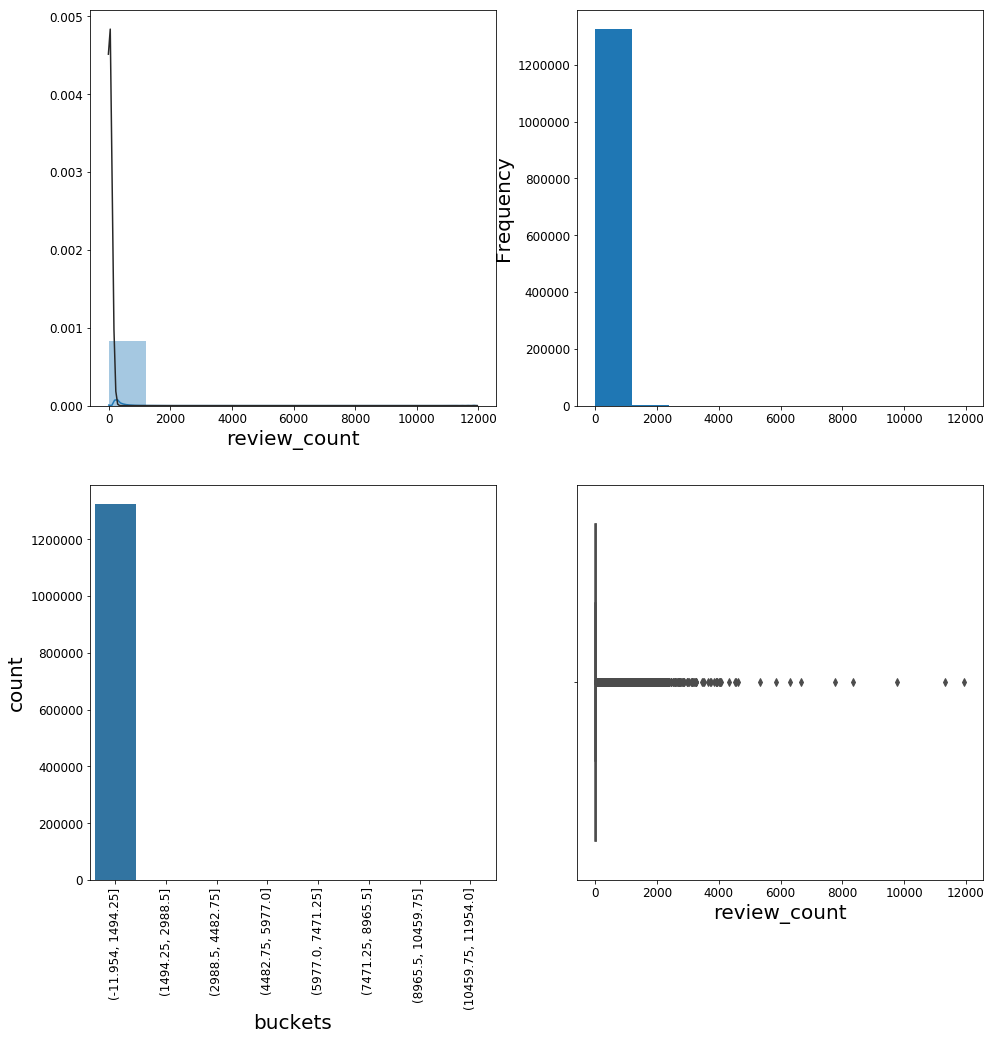

In [0]:

df['buckets'] = pd.cut(df.review_count, 8)

from scipy.stats import norm
fig, ax = plt.subplots(2,2, figsize=(16, 16))
sns.distplot(df.review_count, fit = norm, ax = ax[0][0], bins = 10)
df.review_count.plot('hist',  ax = ax[0][1])
sns.boxplot(df.review_count, ax = ax[1][1], color='red')
sns.countplot(df.buckets, ax = ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=90);



**Major of the reviews lies between the 0 -500**

Text(0, 0.5, 'Review_count_mean')

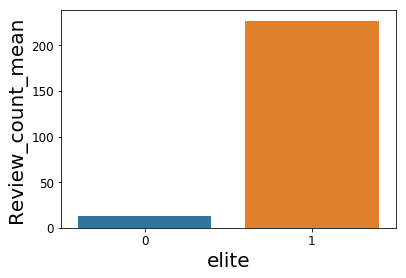

In [0]:
elite_groupby = df.groupby('elite').review_count.mean()
sns.barplot(elite_groupby.index, elite_groupby.values)
plt.ylabel('Review_count_mean')

**This makes sense. To being elite one has to make good impact on the yelp. One way is do alot of reviews. ELite members are making lot of reviews**

Lets see what top review_counts are

In [0]:
review_count_top_10 = df.review_count.value_counts().head(10)
review_count_top_10

1     244232
2     166170
3     125947
4      89844
5      68334
6      54448
7      44497
8      37465
9      32321
10     28455
Name: review_count, dtype: int64

In [0]:
df_with_top_review_count = df[df.review_count.isin(list(review_count_top_10.index))]

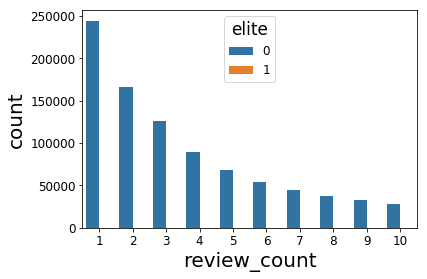

In [0]:
sns.countplot('review_count', hue = 'elite', data = df_with_top_review_count)

**Intresing we do not have the signficant amount of  elite members for reviews counts less then 10**

Lets find the propotion of each class for reviews counts under 10

In [0]:
df_with_top_review_count.elite.value_counts()

0    891688
1        25
Name: elite, dtype: int64

# The problem can be formulated as to build a classifier to predict memeber is elite or not when  review_counts are less then 10**





